In [1]:
from src.utils import VideoInterpTripletsDataset
from src.train import trainGAN
from src.eval import evalGAN
from torch.utils.data import DataLoader

In [2]:
dataset = VideoInterpTripletsDataset('datasets/wow/', read_frames=True)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

hi
137.14218833114722


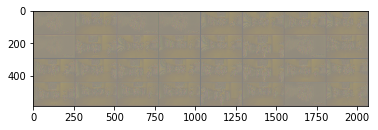

133.5932355147042


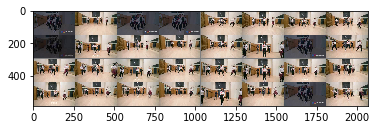

epoch 0 out of 1
D_loss:1.9095962047576904, G_loss:11.383061408996582
mean D_pred_real:0.612185001373291, mean D_pred_gen:0.6075360178947449



(GANGenerator(
   (conv_first): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (conv_list): ModuleList(
     (0): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
     (1): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
     (2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
     (3): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
     (4): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
   )
   (conv_last): Conv2d(16, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (activation): LeakyReLU(negative_slope=0.01)
   (final_activation): Tanh()
 ), GANDiscriminator(
   (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (norm): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, tra

In [8]:
trainGAN(1, dataloader,savePath="./models/OverfitTest_GAN_1",Supervised=True)

hit
./experiments/yeet_generated.png
./experiments/yeet_real.png
Avg. PNSR:9.5702 dB


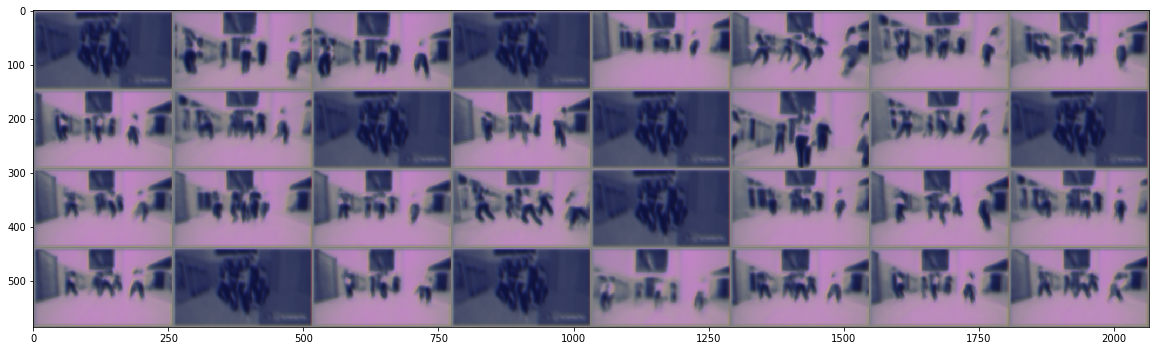

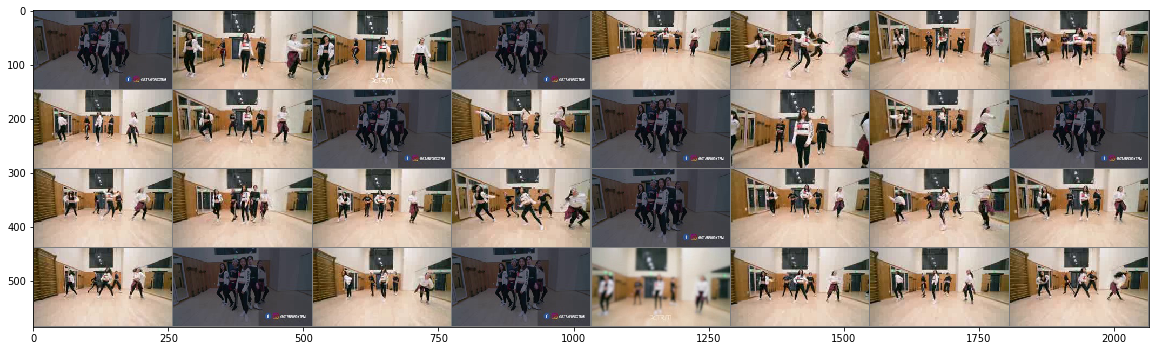

In [3]:
evalGAN(dataloader,"./models/OverfitTest_GAN_1",sampleImagesName="yeet")